## Load the Data

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# 加载数据
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# 将数据转换为DataFrame
df = pd.DataFrame(X, columns=feature_names)

# 显示前几行数据，检查数据类型和缺失值
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


## Data Analysis

In [ ]:
# 基本统计描述
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [ ]:
pd.Series(y).describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
dtype: float64

## Data Visualization

In [ ]:
from matplotlib.font_manager import FontManager
mpl_fonts = set(f.name for f in FontManager().ttflist)

import matplotlib
matplotlib.rc("font", family='SimHei')

Fontconfig warning: ignoring UTF-8: not a valid region tag


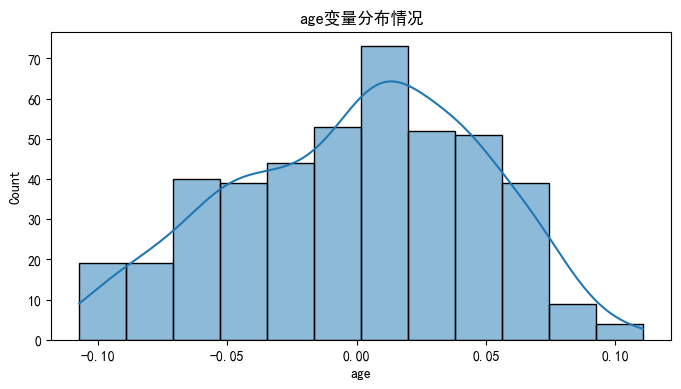

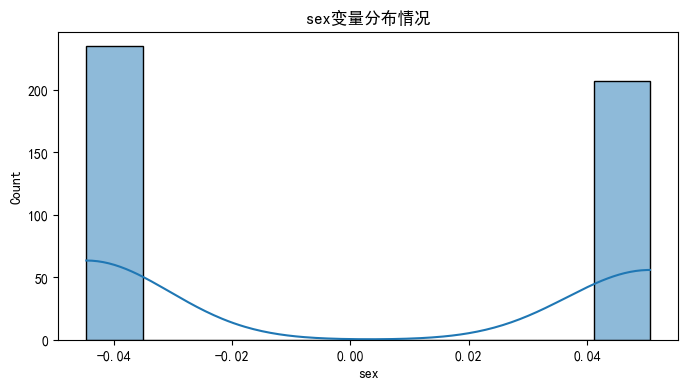

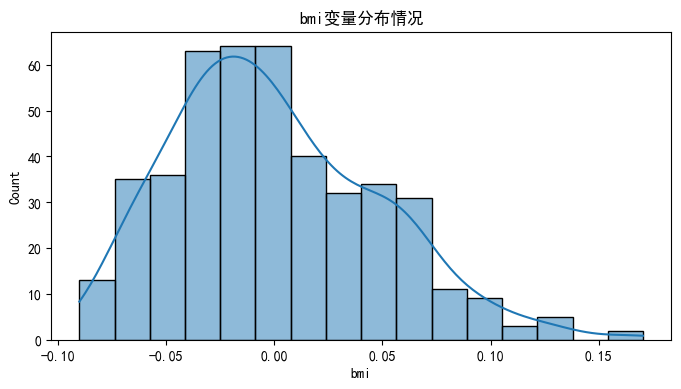

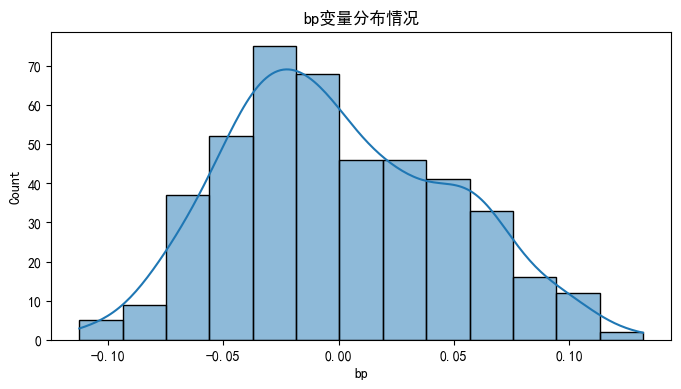

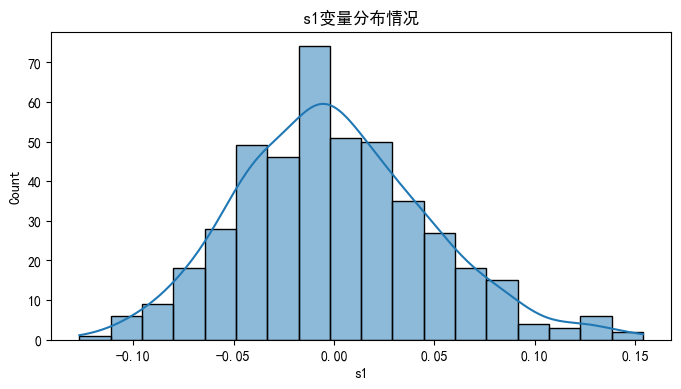

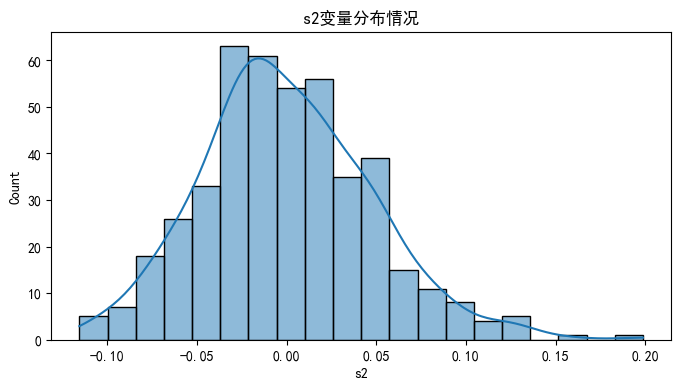

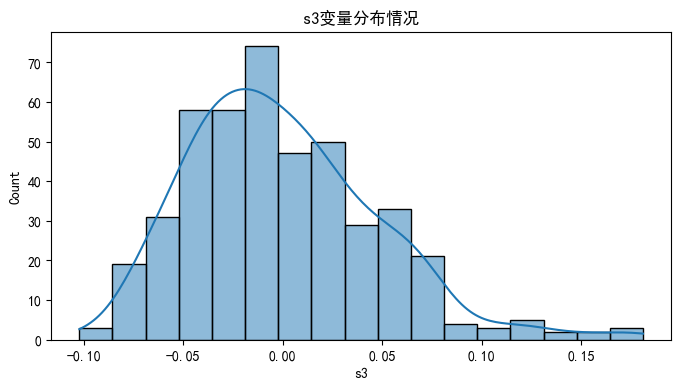

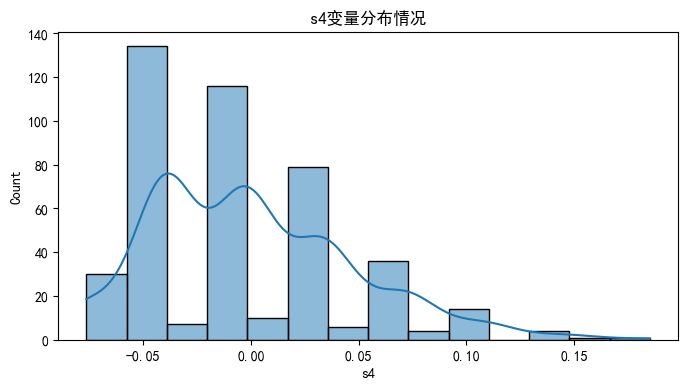

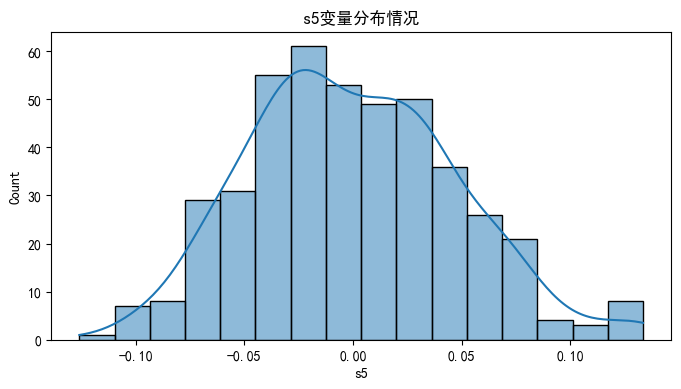

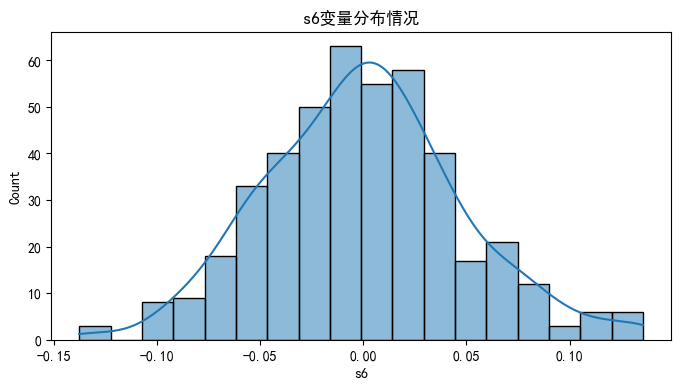

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 单变量分布图
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col}变量分布情况")
    plt.show()

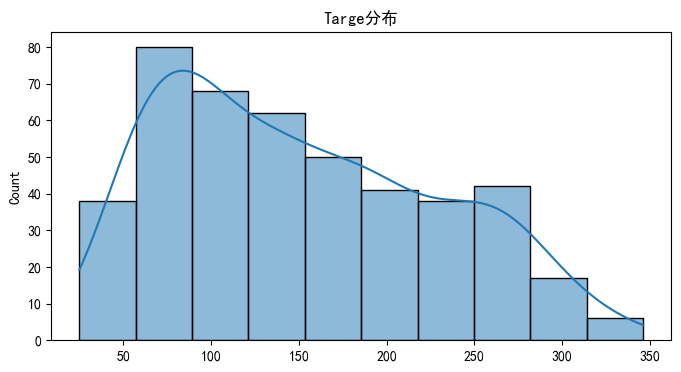

In [ ]:
# 目标变量的分布
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title('Targe分布')
plt.show()

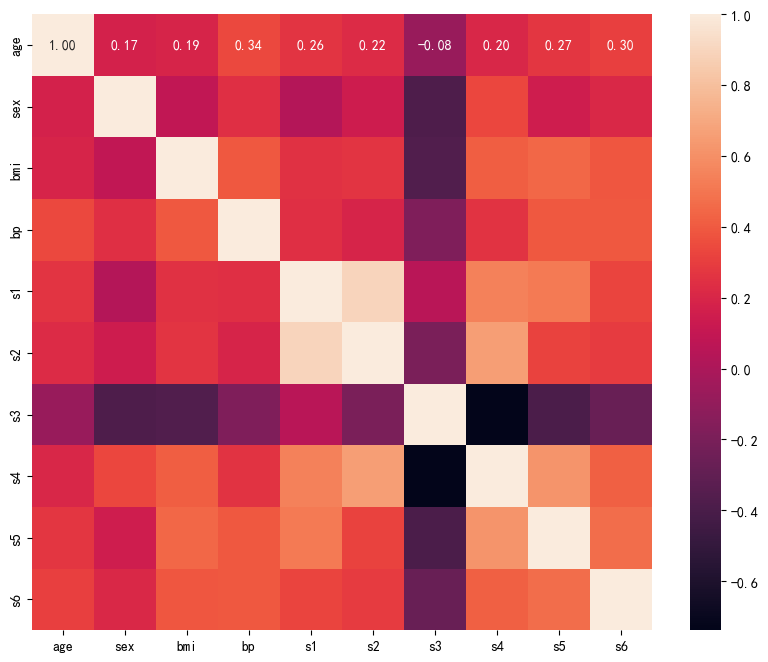

In [ ]:
# 变量间的相关性
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

## Featuring

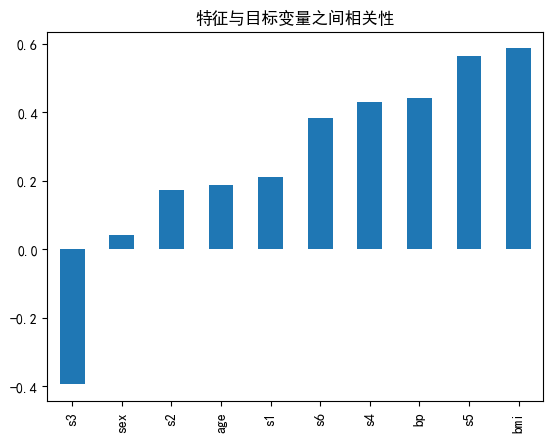

In [ ]:
# 计算特征与目标变量之间的相关性
correlation_with_target = df.corrwith(pd.Series(y))

# 可视化特征与目标变量的相关性
correlation_with_target.sort_values().plot(kind='bar')
plt.title('特征与目标变量之间相关性')
plt.show()

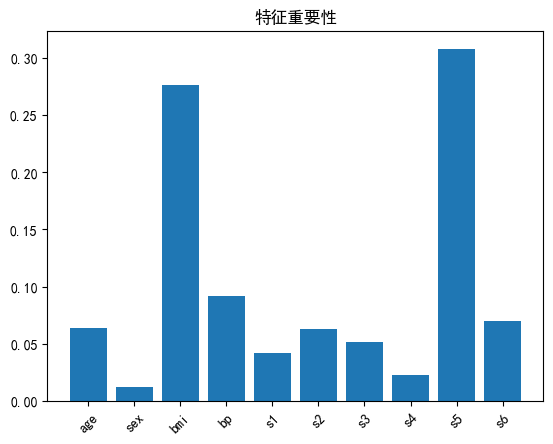

In [ ]:
# 特征选择可以基于模型的特征重要性或统计测试来进行
# 例如，使用随机森林来估计特征的重要性
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_scaled, y)

# 特征重要性
importance = model.feature_importances_

# 可视化特征重要性
plt.bar(feature_names, importance)
plt.title("特征重要性")
plt.xticks(rotation=45)
plt.show()

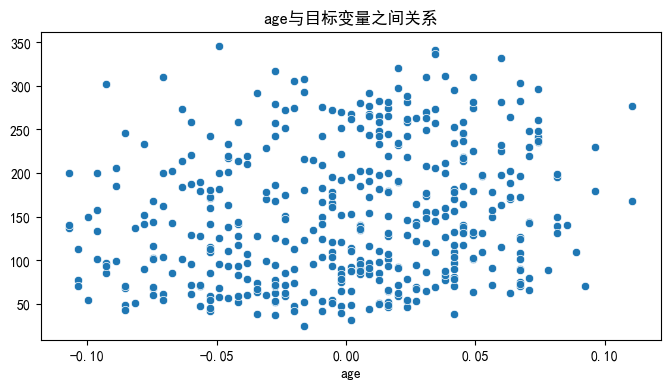

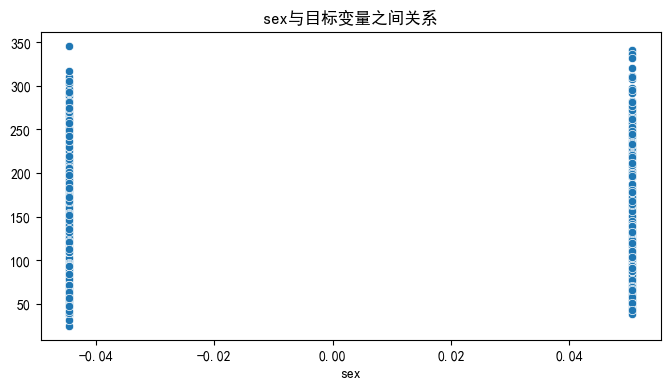

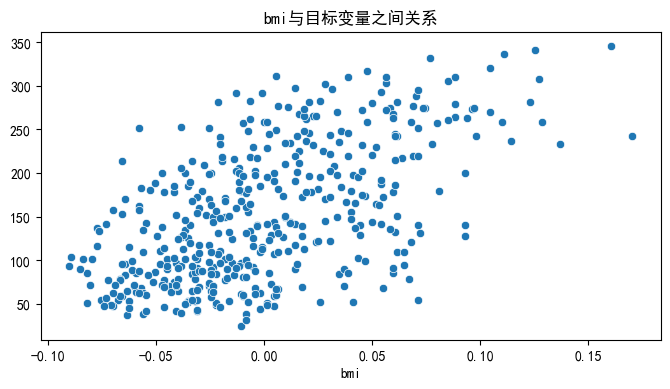

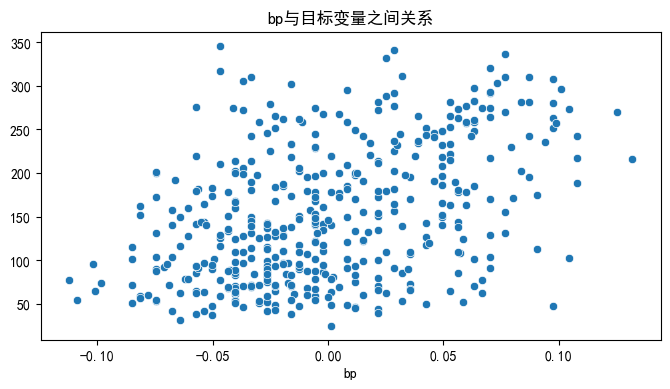

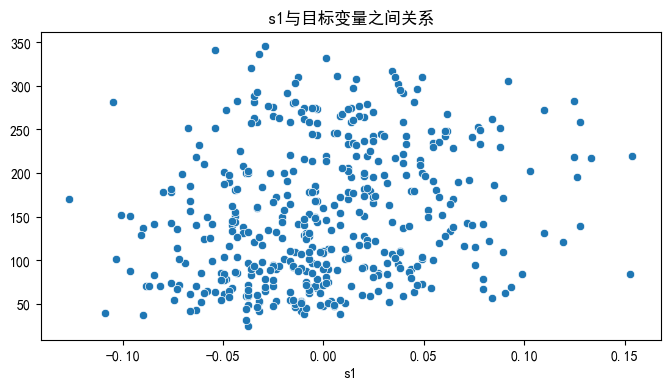

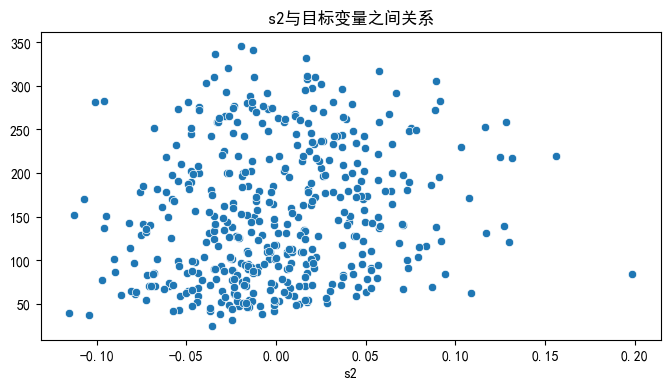

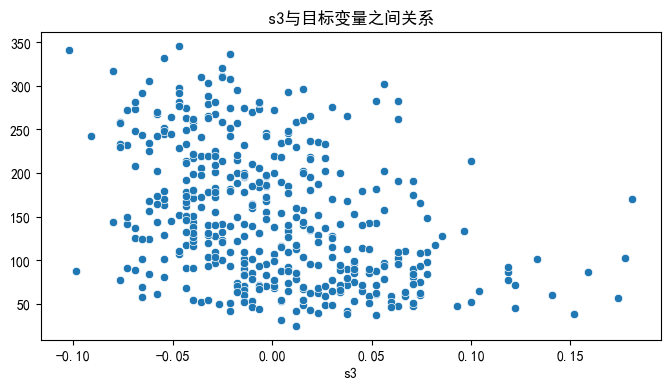

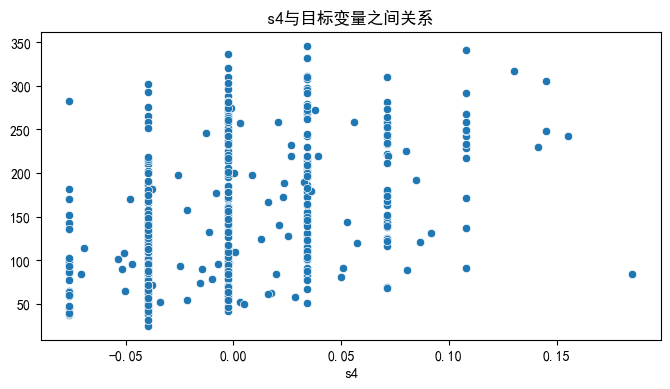

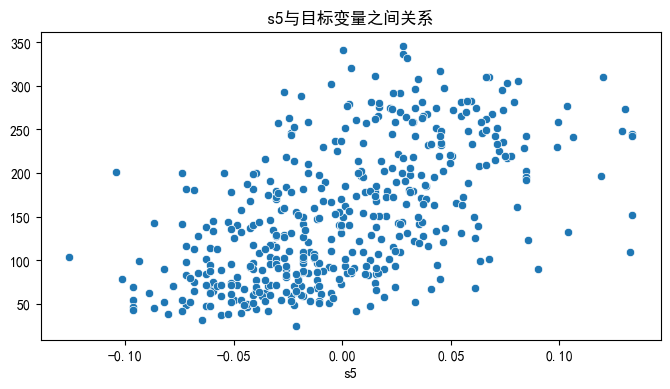

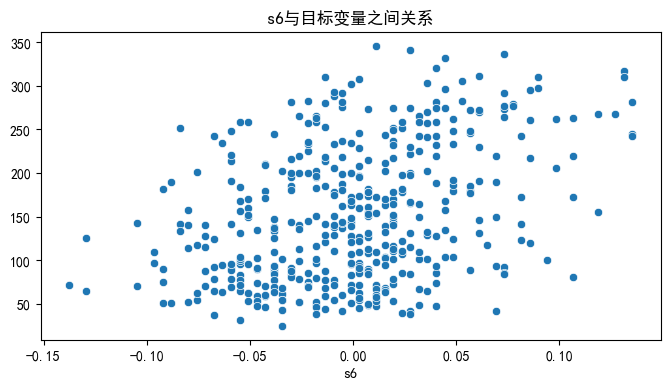

Skewness:
 age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290658
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291754
s6     0.207917
dtype: float64


In [ ]:
# 绘制每个特征与目标变量的关系
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=y)
    plt.title(f'{col}与目标变量之间关系')
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
print("原始数据:", df)
# 去掉sex变量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['sex'], axis=1))
print("标准化后数据:", X_scaled)

原始数据:           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 建立模型
model = LinearRegression()

model.fit(X_train, y_train)  # 训练模型

# 查看原线性回归模型的系数
print("训练后模型系数: \n", model.coef_)
# 查看原线性回归模型的截距
print("训练后模型截距项: ", model.intercept_)

训练后模型系数: 
 [ -0.04112357  28.25901696  16.31894263 -39.00787641  22.45874548
   6.54397795   8.62288047  32.12372976   1.64248966]
训练后模型截距项:  150.92789609059292


In [ ]:
# 使用测试集预测结果
y_pred = model.predict(X_test)

# 计算均方误差和 R2 值
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("模型预测性能指标：")
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

模型预测性能指标：
Mean Squared Error:  2870.7675447531797
R2 Score:  0.46820972953378515


In [ ]:
from sklearn.linear_model import Lasso

# 使用 Lasso 回归
lasso_model = Lasso(alpha=1)  # alpha 是正则化强度，需要调整以找到最佳值
lasso_model.fit(X_train, y_train)

# 使用测试集预测结果
y_pred_lasso = lasso_model.predict(X_test)

# 计算调优后的均方误差和 R2 值
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - Mean Squared Error: ", mse_lasso)
print("Lasso Regression - R2 Score: ", r2_lasso)


Lasso Regression - Mean Squared Error:  2848.4886165131074
Lasso Regression - R2 Score:  0.4723367503008058


In [ ]:
# 查看 Lasso 回归模型的系数
print("Coefficients: \n", lasso_model.coef_)

# 查看模型的截距
print("Intercept: ", lasso_model.intercept_)

Coefficients: 
 [ 0.         28.50200546 15.32645979 -6.19119506 -0.         -9.18433868
  0.39690455 20.16080351  1.4978134 ]
Intercept:  150.93430596832263


In [ ]:
import joblib

# 保存模型
joblib.dump(model, 'linear_regression_model.pkl')

# 在另一个程序中加载和使用模型
loaded_model = joblib.load('linear_regression_model.pkl')
y_loaded_pred = loaded_model.predict(X_test)
